<a href="https://colab.research.google.com/github/ForhanShahriarFahim/Artificial-Intelligence-Lab/blob/master/2_Binary_Image_Classifier(Badam_Chola).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [ ]:
# from google.colab import drive
import os
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import vgg16
from keras.layers import Conv2D, Input, Dense, Activation, MaxPooling2D, Flatten
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

drive.mount('/content/drive')

### Loading data (label: Badam - 0, Chola - 1)

In [ ]:
# Define your directory and categories
DIRECTORY = '/content/drive/MyDrive/Classifier Dataset/Dataset'
CATEGORIES = ["Badam", "Chola"]
# Read and label the data
data = []
for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    label = CATEGORIES.index(category)

    for img in os.listdir(folder):
        image = os.path.join(folder, img)
        image_arr = cv2.imread(image)
        image_arr = cv2.resize(image_arr, (256, 256))
        image_arr = cv2.cvtColor(image_arr, cv2.COLOR_BGR2RGB)
        data.append([image_arr, label])

### Data processing


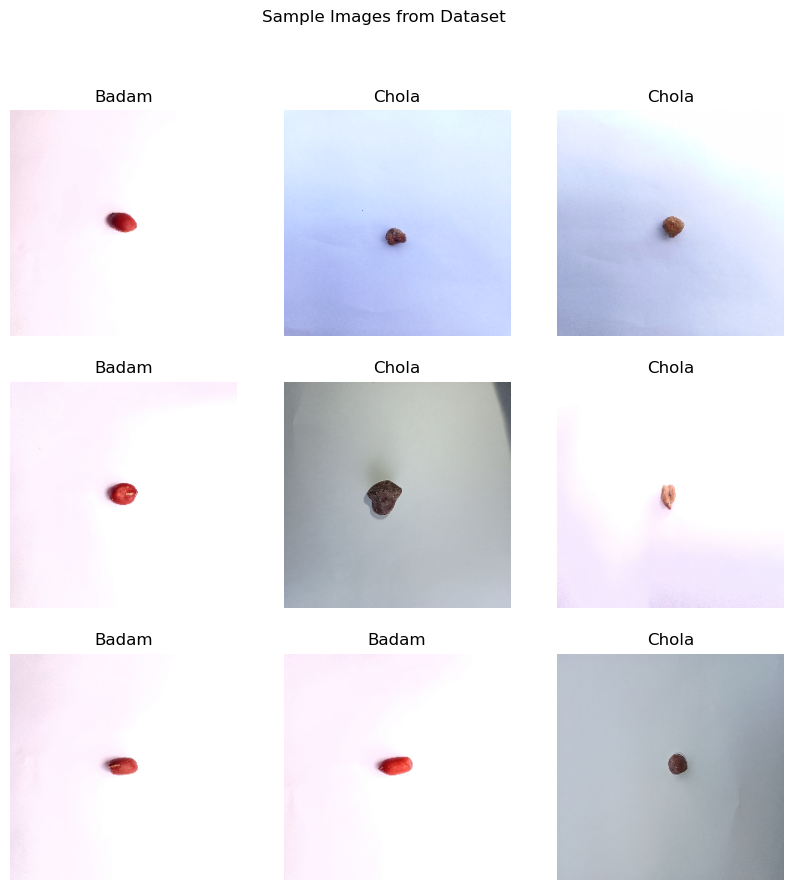

In [ ]:
# Shuffle the data
random.shuffle(data)

# Create lists for images and labels
x = []
y = []

# Split data into x (images) and y (labels)
for features, label in data:
    x.append(features)
    y.append(label)

# Convert to numpy arrays
x = np.array(x)
y = np.array(y)


# Function to get class labels
def get_label(label):
    if label == 0:
        return "Badam"
    elif label == 1:
        return "Chola"
    else:
        return "Unknown"


# Display sample images with labels
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x[i])  # Display the image
    plt.title(get_label(y[i]))  # Display the corresponding label
    plt.axis("off")
plt.suptitle("Sample Images from Dataset")
plt.show()

### Split the data into train, validation, and test sets

In [ ]:
# Normalize the image data
x = x / 255.0

# Split the data into train, validation, and test sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42
)

print("x_train shape:", x_train.shape)
print("x_val shape:", x_val.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

x_train shape: (763, 256, 256, 3)
x_val shape: (85, 256, 256, 3)
x_test shape: (212, 256, 256, 3)
y_train shape: (763,)
y_val shape: (85,)
y_test shape: (212,)


### Model Architecture

In [ ]:
input_shape = (256, 256, 3)
inputs = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation="relu")(inputs)
x = MaxPooling2D(2, 2)(x)
x = Conv2D(64, (3, 3), activation="relu")(x)
x = MaxPooling2D(2, 2)(x)
x = Conv2D(128, (3, 3), activation="relu")(x)
x = MaxPooling2D(2, 2)(x)
x = Conv2D(128, (3, 3), activation="relu")(x)
x = MaxPooling2D(2, 2)(x)
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
outputs = Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 128)       7385

In [ ]:
# Define a callback to save the model during training
checkpoint_path = "./Save-Model/model_checkpoint.h5"
checkpoint = ModelCheckpoint(
    checkpoint_path, monitor="val_accuracy", verbose=1, save_best_only=True, mode="max"
)

### Fit the model with the defined callback

In [ ]:
# Fit the model with the defined callback
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint],
)

Epoch 1/10
24/24 [==============================] - ETA: 0s - loss: 0.8097 - accuracy: 0.5177
Epoch 1: val_accuracy improved from -inf to 0.49412, saving model to ./Save-Model\model_checkpoint.h5
24/24 [==============================] - 35s 1s/step - loss: 0.8097 - accuracy: 0.5177 - val_loss: 0.6927 - val_accuracy: 0.4941
Epoch 2/10
24/24 [==============================] - ETA: 0s - loss: 0.5774 - accuracy: 0.7064
Epoch 2: val_accuracy improved from 0.49412 to 0.84706, saving model to ./Save-Model\model_checkpoint.h5
24/24 [==============================] - 32s 1s/step - loss: 0.5774 - accuracy: 0.7064 - val_loss: 0.2681 - val_accuracy: 0.8471
Epoch 3/10
24/24 [==============================] - ETA: 0s - loss: 0.3338 - accuracy: 0.8637
Epoch 3: val_accuracy improved from 0.84706 to 0.96471, saving model to ./Save-Model\model_checkpoint.h5
24/24 [==============================] - 35s 1s/step - loss: 0.3338 - accuracy: 0.8637 - val_loss: 0.1231 - val_accuracy: 0.9647
Epoch 4/10
24/24 [=

### Evaluate the model on the test set

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nTest Accuracy:", test_acc)

7/7 [==============================] - 2s 243ms/step - loss: 0.0392 - accuracy: 0.9906

Test Accuracy: 0.9905660152435303


### Plotting Accuracy and Loss

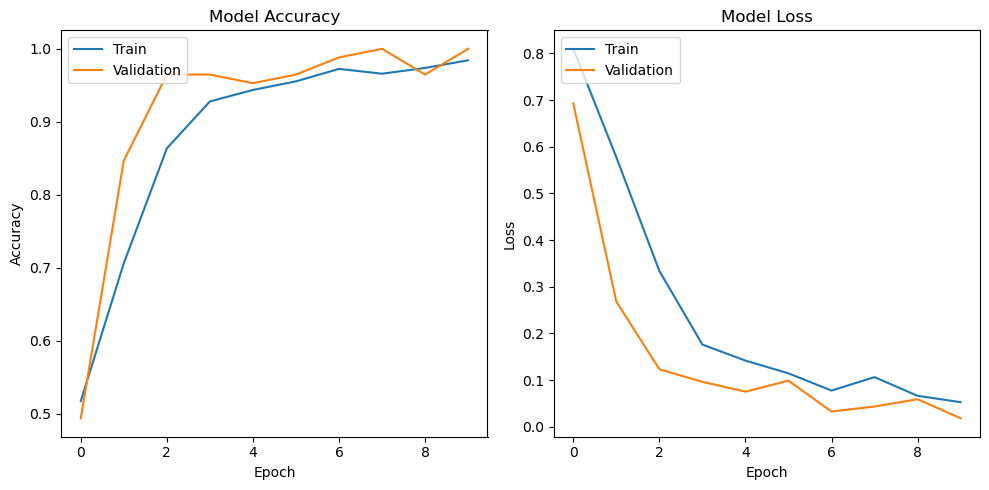

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

plt.tight_layout()
plt.show()

### Confusion matrix

7/7 [==============================] - 2s 262ms/step


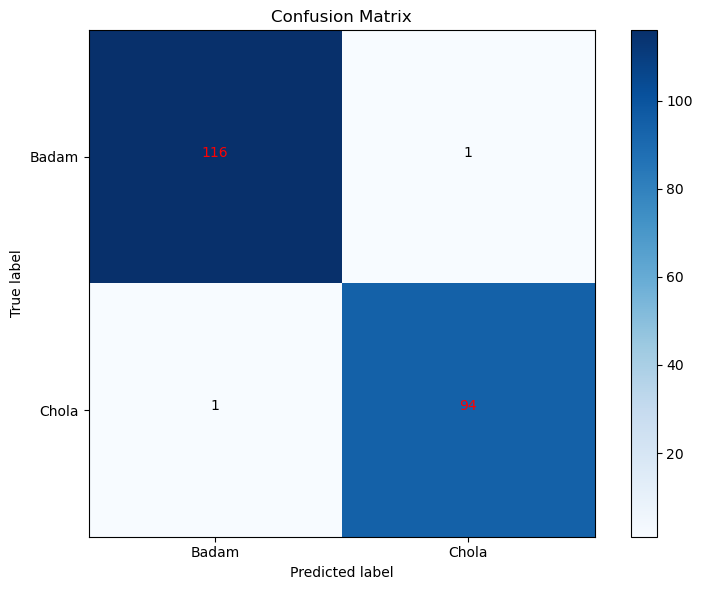

Precision (Chola): 0.9895
Recall (Chola): 0.9895
Specificity (Badam): 0.9915
Accuracy: 0.9906


In [ ]:
# Assuming you have predictions and true labels from your test set
y_pred = model.predict(x_test)


# Convert predicted probabilities to binary predictions
y_pred_binary = np.where(y_pred > 0.5, 1, 0)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)


# Define the function to calculate metrics
def calculate_metrics(confusion_matrix):
    TN = confusion_matrix[0, 0]  # True Negatives
    FP = confusion_matrix[0, 1]  # False Positives
    FN = confusion_matrix[1, 0]  # False Negatives
    TP = confusion_matrix[1, 1]  # True Positives

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    specificity = TN / (TN + FP)

    return accuracy, precision, recall, specificity


# Calculate metrics
accuracy, precision, recall, specificity = calculate_metrics(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

# Add labels to the plot
classes = ["Badam", "Chola"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Add text annotations
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(
            j,
            i,
            format(cm[i, j], "d"),
            horizontalalignment="center",
            color="red" if cm[i, j] > thresh else "black",
        )

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()

plt.show()

print(f"Precision (Chola): {precision:.4f}")
print(f"Recall (Chola): {recall:.4f}")
print(f"Specificity (Badam): {specificity:.4f}")
print(f"Accuracy: {accuracy:.4f}")